
# Kapitel 2: Messunsicherheiten


Version: 8. Mai 2025

Autoren: Markus Lippitz, Thorsten Schumacher


In diesem Kapitel besprechen wir den Umgang mit Messunsicherheiten, manchmal auch Messfehler genannt.
Es ist jedoch sinnvoll, zwischen Fehlern und Unsicherheiten zu unterscheiden.
Fehler sollten vermieden werden. Unsicherheiten lassen sich nicht vermeiden,
können aber verringert werden.


Falls Sie nun oder später einmal mehr dazu lesen wollen, dann sind dies gute Quellen

- [**Kirkup / Frenkel**](https://doi.org/10.1017/CBO9780511755538) Das Buch 'An Introduction to Uncertainty in Measurement using the
    GUM' von Les Kirkup und Bob Frenkel gibt auf ca. 200 Seiten eine
    sehr gut lesbare Einführung in das Thema. Hier werden auch alle
    Beziehungen hergeleitet, auf die in diesem Tutorial nur verwiesen
    wird. Auch zeigen die Autoren viele Beispiele.

- [**Stahel**](https://doi.org/10.1007/978-3-322-96962-0) DIe 'Statistische Datenanalyse' umfasst mehr Statistik, ist aber auch sehr anwendungsorientiert. Zunächst reicht es, die grau unterlegten Kästen zu lesen.

Das hier beschriebene Vorgehen ist international standardisiert  im **'Guide to the Expression of Uncertainty in
Measurement' (GUM)** des [*Bureau International des Poids et Mesures*](https://www.bipm.org/en/committees/jc/jcgm/publications).

## Vokabeln

Lassen Sie uns zunächst ein paar Begriffe genauer festlegen:

**Grobe Fehler** sind beispielsweise offensichtliche Fehlbedienungen des Messgeräts und
manifestieren sich durch eine deutliche Abweichung des gemessenen Werts
vom erwarteten Messwert. Solche Fehler sollte man natürlich vermeiden.
Falls sie doch auftreten und bemerkt werden, dann wiederholt man
wahrscheinlich am einfachsten die Messung oder schließt zumindest diesen
Messwert von der weiteren Analyse aus.


**Systematische Fehler** sind eine Umschreibung dafür, dass der Messprozess nicht ganz so
einfach, so ideal ist, wie man zunächst denken könnte. Eine Waage zeigt
einen von Null verschiedenen Wert an, auch wenn keine Masse aufgelegt
ist. Ein Maßstab dehnt sich mit der Temperatur aus. Diese und ähnliche
Komplikationen berücksichtigt man durch eine passende Erweiterung des
Modells, das die Messung beschreibt. Danach sollten diese Fehler keine
Rolle mehr spielen, falls doch, dann beschreiben systematische Fehler
mangelndes Verständnis des Messprozesses und sind häufig erst im
Rückblick zu erkennen. Gute Experimente zeichnen sich dadurch aus, dass
systematische Fehler vollständig behandelt werden.


**Unsicherheiten** sind aber nie zu vermeiden. Sie können verschiedene Ursachen habe. Jede
Waage zeigt das Gewicht nur mit einer endlichen Anzahl Stellen an,
beispielsweise $ m=12.3$ g. Das wahre Gewicht kann damit aber immer noch
im Intervall $12.25$ g  &mdash;  $12.35$ g liegen. Wiederholte Messungen unter
konstanten Bedingungen können abweichende, leicht schwankende Ergebnisse
liefern. Dieses Rauschen ist ein Zeichen dafür, dass die Bedingungen
technisch oder auch grundsätzlich nicht exakt kontrolliert werden
können. Wieviel Atome einer Probe in der nächsten Sekunde einen Alpha-Zerfall machen
unterliegt nicht unserer Kontrolle.

Die Bestimmung dieser Unsicherheit für gemessene und berechnete Werte ist Gegenstand dieses Kapitels.

### Schreibweisen

Man gibt die **Standard-Unsicherheit** an, die mit der Standardabweichung verknüpft ist. Dazu gibt es verschiedene Schreibweisen, hier am Beispiel der Waage von oben.

* $m = 12.3$ g, $u_m = 0.1$ g (machmal auch $u(m) = 0.1$ g)
* $m = (12.3 \pm 0.1) g$
* $m = 12.3(1)$ g

Die erste ist die genaueste, da sie Verwechslungen mit anderen Angaben, wie z.B. Toleranz oder eine andere als die Standardunsicherheit, vermeidet. Bei der zweiten wird das $\pm$ mit `$12.3 \pm 0.1$` dargestellt. Im dritten Fall wird die Unsicherheit (in Klammern) in Einheiten der letzten Stelle des Wertes angegeben.

Aus der dritten Form geht hervor, dass die Anzahl der angegebenen/gerundeten Stellen dem Wert der Unsicherheit entsprechen muss. Dasselbe gilt für die anderen Formen. Es ist gute Praxis, auch Werte ohne separate Unsicherheitsangabe so zu runden, dass die angegebenen Stellen der geschätzten Unsicherheit entsprechen.

**Beispiele**

korrekt sind $m = (12.34 \pm 0.02)$ g,  $m = (1230 \pm 10)$ kg,  $m = (1200 \pm 100)$ mg, $m = (12.00 \pm 0.02)$ g

falsch sind $m = (12.3456 \pm 0.02)$ g,  $m = (1233 \pm 10)$ kg,  $m = (1234.5 \pm 100)$ mg

Die Unsicherheit der Unsicherheit ist ein fortgeschrittenes Thema. Wenn man (wie wir in diesem Kapitel) nicht besonderes weiß oder tut, dann reicht es, die Unsicherheit grob abzuschneiden und wie hier nur eine Stelle anzugeben. Falsch wäre also auch $m = (12.34 \pm 0.0234)$ g,  $m = (1230 \pm 11.4)$ kg,  $m = (1200 \pm 104)$ mg.

### Fehlerbalken

In Graphen zeichnet man oft einen 'Fehlerbalken' ein, der von $m - u(m)$ bis $m + u(m)$ reicht.

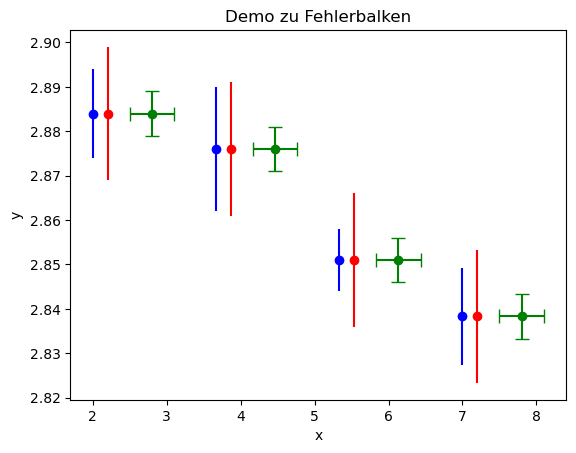

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Demo-Datensatz
x = np.linspace(2, 7, 4)                         # 4 Werte gleichmäßig zwischen 2 und 7
y = np.array([2.884, 2.876, 2.851, 2.8383])      # 4 Werte von Hand eingegeben
# Unsicherheiten in y 
u_y = np.array([0.01, 0.014, 0.007, 0.011])     # hier jeder Messwert eine andere Unsicherheit
plt.errorbar(x, y, yerr=u_y, fmt='o',  color='blue')

plt.errorbar(x+ 0.2, y, yerr=0.015,  fmt='o', color='red') # hier alle Messwerte mit der gleichen Unsicherheit
plt.errorbar(x+ 0.8, y, yerr=0.005, xerr=0.3,  fmt='o', color='green', capsize=5) # hier auch mit x-Unsicherheit und "Kapitellen"

plt.xlabel('x')
plt.ylabel('y')
plt.title('Demo zu Fehlerbalken');

### Gleichheit von Werten mit Unsicherheiten


Man sagt, eine Messung ist mit einem Literaturwert "verträglich", wenn der Literaturwert innerhalb des Fehlerbalkens liegt. Zwei Messungen werden als gleich angesehen, wenn ihre Fehlerbalken überlappen. Das ist aber nur eine Wahrscheinlichkeits-Ausage. Mit einer gewissen Wahrscheinlichkeit (ca. 32%) liegt der wahre Wert auch außerhalb des Fehlerbalken. Details dazu in den oben genannten Büchern.

## Bestimmung der Messunsicherheit 

Die Standard-Messunsicherheit $u(x)$ eines Eingangswerte $x$ ist die
Standard-Abweichung seiner Wahrscheinlichkeitsverteilung, was manchmal auch mit $\sigma_x$ bezeichnet wird. Man muss also
durch Messen (Typ A) oder andere Quellen (Typ B) die
Wahrscheinlichkeitsverteilung von $x$ bestimmen und daraus dann die
Standard-Abweichung berechnen.


### Typ A: Wahrscheinlichkeitsverteilung messen
Unsicherheiten vom Typ A werden durch statistische Methoden ermittelt.
Beispielsweise wird eine Messung wiederholt durchgeführt. Als Wert des
Größe kann dann der Mittelwert dieser Messungen dienen, als Unsicherheit
die Standardabweichung der Einzelmessung oder des Mittelwerts.
Aufwändigere Auswerteverfahren sind denkbar, beispielsweise um eine
darunter liegende Drift zu bereinigen oder eine Größe und deren
Unsicherheit per Regression zu bestimmen. 


Wiederholte, unabhängige Messungen $x_{k}$ bei ansonsten konstanten
Bedingungen liefern die Wahrscheinlichkeitsverteilung und somit $u(x)$
```math
u(x) = \sqrt{\frac{1}{n -1}  \, \sum_{k= 1}^{n} \left( x_{k} - \bar{x} \right)^2} 
\quad \text{mit} \quad 
\bar{x}= \frac{1}{n}  \, \sum_{k= 1}^{n}  x_{k}
```
mit dem Mittelwert $\bar{x}$.
Ebenso liefert die
lineare Regression oder andere Methoden der kleinsten Quadrate eine
Standard-Abweichung und somit die Messunsicherheit (dazu unten mehr).



### Typ B: Wahrscheinlichkeitsverteilung aus anderen Quellen
Unsicherheiten vom Typ B sind nicht über statistische Methoden
zugänglich. Beispiele sind die endliche Auflösung einer Waage oder die
tabellierte Messunsicherheit eines Multimeters. In diesen Fällen
bestimmt man die Spannung über einem Widerstand eben nicht mit 10
verschiedenen Multimetern und benutzt dann Statistik, um Aussagen zu
treffen, sondern man benutzt aufgeschriebene, dokumentierte Angaben zur
Unsicherheit. 

Die Idee ist aber die selbe: Welche Wahrscheinlichkeitsverteilung der Messwerte hat man und durch welche Standardabweichung wird diese beschrieben?


Bei manchen Geräten, beispielsweise Multimetern, ist eine **Toleranz** in
der Form $a = n$ digits $+ x$% des Vollausschlags angegeben. Der 'wahre'
Wert sollte also in einem Intervall der Breite $[-a, a]$ liegen. Solch
eine rechteckige Verteilung hat die Standard-Abweichung
$u = a / \sqrt{3}$.

**Ablesen digitaler Anzeigen:**
Selbst wenn keine Toleranz angegeben ist, so gilt doch mindestens
$a = 0.5$ digits, da keine Aussage über nicht dargestellte Stellen
gemacht werden kann. Somit wird hier ebenfalls $u = a / \sqrt{3}$.


### Kombination von Typ A und Typ B

Man sollte auch prüfe, ob nicht beide Quellen A und B zur
Messunsicherheit beitragen. Wenn beispielsweise die Standard-Abweichung
aus mehreren Messungen nach Typ A bestimmt wird, jede Einzelmessung aber
eine nicht zu vernachlässigende Messunsicherheit nach Typ B hat. In
diesem Fall addieren sich die Varianzen. Für die
Standard-Messunsicherheit gilt also
```math
u_{\text{gesamt}} = \sqrt{ u_{A}^2  + u_{B}^2 } \quad .
```
Als
Daumenregel kann man annehmen, dass dieser Fall relevant wird, wenn das
Verhältnis der beiden Messunsicherheiten kleiner als drei ist.


## Beispiel: Kraftsensor

Lassen Sie uns als Beispiel die wiederholte Messung mit einem Pasco Kraftsensor betrachten. Wir laden den Datensatz von Github:

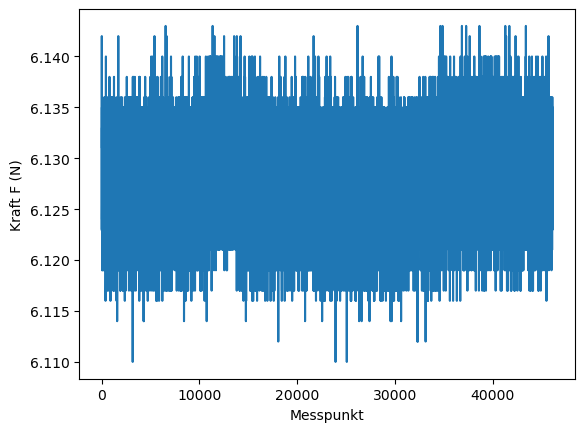

In [2]:
# Einlesen und Spalte umbenennen, erste Zeile ignorieren
data = pd.read_csv("https://raw.githubusercontent.com/Lippitz-Lab/praktikum_1/refs/heads/main/src/Kraftsensor.csv", delimiter=";", decimal=",", names = ['F'] , header =1) ;
plt.plot(data.F);
plt.xlabel('Messpunkt')
plt.ylabel('Kraft F (N)');

Das Histogramm über alle Messpunkte berechnen und plotten wir in einem Zug mit `hist` aus `matplotlib`. mit `density=True`ist es so normiert, dass das Integral 1 ergibt. Die Einheit ist darum die reziproke Einheit der x-Achse. Die Anzahl der Balken geben wir vor. Diese werden dann gleichmäßig verteilt.

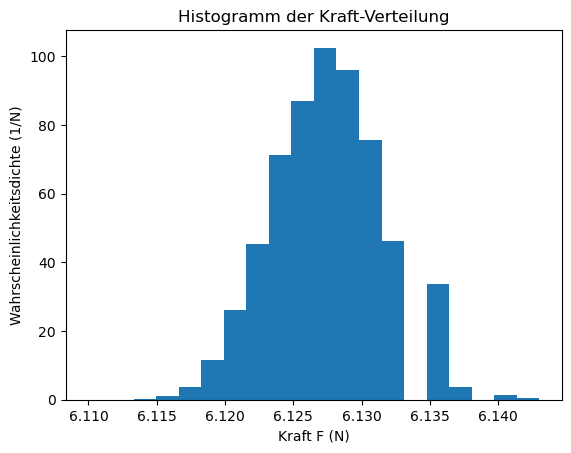

In [3]:
plt.hist(data.F, bins=20, density=True);
plt.xlabel("Kraft F (N)")
plt.ylabel("Wahrscheinlichkeitsdichte (1/N)")
plt.title("Histogramm der Kraft-Verteilung");

Bei diesem Sensor wird die Verteilung der Messwerte durch sein Rauschen bestimmt und ist annähernd Gaußverteilt. Unabhängig von der Form der Verteilung berechnen wir die Unsicherheit als Standardabweichung mit 'np.std'.

In [4]:
np.std(data.F)

0.004035159906213629

Bei der Standardabweichung muss man vorsichtig mit dem Term $1/(n-1)$ sein. Es gibt verschiedene Definitionen, die jeweils ihre Berechtigung haben. Je nach dem, ob man eine Verteilung beschreiben will, oder die Unsicherheit eines Werts in dieser Verteilung berechnen will, nimmt man  $1/n$ oder $1/(n-1)$. Bei großen $n$ macht das natürlich keinen Unterschied. Die Funktion 'std' nimmt   $1/n$, falls man nicht via `ddof = 1` auf $1/(n-1)$ umschaltet (ddof = delta Degrees of Freedom)

In [5]:
np.std(data.F, ddof=1)

0.004035203648495686

Wir vergleichen nun noch, ob die Verteilung der Messwerte ungefähr die erwartete Normalverteilung ist, in dem wir diese darüber zeichnen.

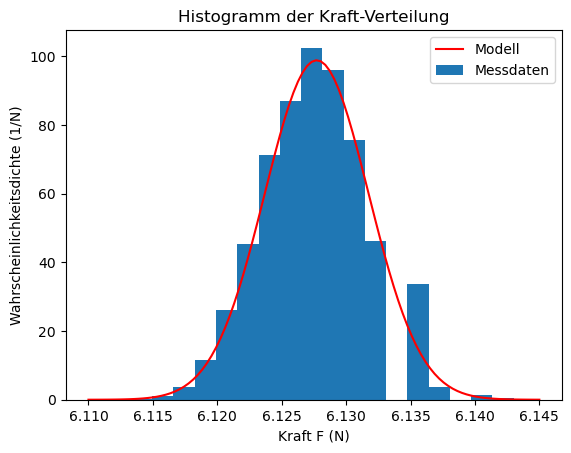

In [6]:
# Modell (wie man sowas macht kommt nächste Woche )
# Normalverteilung mit Mittelwert und Standardabweichung der Daten
Fmod = np.linspace(6.11, 6.145, 100) # 100 Werte gleichmäßig zwischen 6.11 und 6.145
Wmod  = np.exp(-0.5 * ((Fmod - np.mean(data.F)) / np.std(data.F))**2) / (np.std(data.F)* np.sqrt(2 * np.pi)) # Normalverteilung
plt.plot(Fmod, Wmod, color='red', label='Modell')

plt.hist(data.F, bins=20, density=True, label="Messdaten");
plt.xlabel("Kraft F (N)")
plt.ylabel("Wahrscheinlichkeitsdichte (1/N)")
plt.title("Histogramm der Kraft-Verteilung");
plt.legend();

## Funktionen einer Variablen

Oft ist der Messwert nur der Ausgangspunkt für eine Berechnung. Wie groß ist die Unsicherheit des berechneten Ergebnisses, wenn die Unsicherheit des Messwertes bekannt ist? Wir beginnen mit Berechnungen, die nur auf einer Variablen basieren, also $Y = f(X)$. Ich benutze von nun an große Buchstaben für 'wahre' Werte und kleine für gemessene.

Man macht nun zwei Annahmen:
* Die Messwerte sind normalverteilt. Wiederholte Messung ergibt also eine Gauß'sche Glockenkurve. Deren Breite wird durch die Messunsicherheit, also die Standardabweichung beschrieben.
* Die Funktion $f(X)$ kann als linear in der Nähe des Messwerts $x$ angenommen werden. Wir machen also eine Taylor-Entwicklung von $f(X)$ um $X=x$ und brechen nach dem linearen Glied ab. Das geht um so besser, je kleiner die relative Unsicherheit, also $u(x)/x$ ist.

Wenn das so ist, dann ist
```math
 u_y = \left|\,  u_x  \,  \left. \frac{\partial f}{\partial X} \right|_{X =x} \,  \right|
```

Man kann sich das so vorstellen, als würde man bei dem Eingangswert $X$ der Funktion $f$ leicht wackeln (um $u_x$) und dann schauen, um wieviel sich das Ergebnis ändert.

**Beispiel** Der Radius einer Kugel wird gemessen als $r = (2.1 \pm 0.1)$ mm. Wie groß ist das Volumen der Kugel und seine Unsicherheit?

In [7]:
V = 4/3 * np.pi * (2.1)**3
V

38.79238608652677

Das Volumen ist $V = 4/3 \pi r^3$, also ca. 38.792386 mm $^3$.

In [8]:
u_v = 4 * np.pi * (2.1)**2 * 0.1
u_v

5.541769440932395

Die Unsicherheit ist $u_v = 4 \pi r^2 \, u_r$, also 5.541 mm $^3$

Ingesamt schreibt man das als $V = 39 \pm 5$ mm $^3$. (40 wäre auch OK zu sagen)

## Funktionen mehrere Variablen

Nun sein $Z = f(X,Y)$. Wir messen wiederum die Werte $x$ und $y$, beispielsweise als Mittelwert von vielen Messungen, und deren Unsicherheit aus der Standardabweichung. Zusätzlich zu den oben gemachten Annahmen machen wir eine weitere
* die Größen $x$ und $y$ sind *unabhängig* voneinander.

Das bedeutet, wenn man viele Paare von Werten $(x_i, y_i)$ misst und in ein Koordinatensystem einzeichnet, dann ist das eine runde Punktwolke. Wenn ein $x_i$ nach oben vom Mittelwert abweicht, dann sagt das nichts darüber aus, in welche Richtung und wie weit der zugehörige $y_i$ von seinem Mittelwert $\bar{y}$ abweicht.

Das hat zur Folge, dass sich die Beiträge quadratisch addieren:
```math
 u_z = \sqrt{ \left( u_x  \,  \left. \frac{\partial f}{\partial X} \right|_{X =x} \right)^2
 + \left( u_y  \,  \left. \frac{\partial f}{\partial Y} \right|_{Y =y} \right)^2  }
```
Es ist nämlich eher unwahrscheinlich, dass sowohl $x$ als auch $y$ beide am Rand ihrer Verteilung liegen. Das nennt man 'Gauß'sche Fehlerfortpflanzung', obwohl sich Unsicherheiten fortpflanzen.

Bei **einfachen Funktionen** kann man das im Kopf machen: Bei Addition und Subtraktion addieren sich die Unsicherheiten quadratisch: 
```math
 Y = A + B - C \quad \rightarrow \quad u_Y^2 = u_A^2 + u_B^2 + u_C^2
```
Man beachte, dass sich Unsicherheiten nie kompensieren.

Bei Multiplikation und Division addieren sich die relativen Unsicherheiten quadratisch
```math
 Y = \frac{A B }{ C} \quad \rightarrow \quad \left( \frac{u_Y}{Y}\right)^2 
 = \left( \frac{u_A}{A}\right)^2 + \left( \frac{u_B}{B}\right)^2 +  \left( \frac{u_C}{C}\right)^2 
```
Das schöne an der quadratischen Addition ist, dass man alle Terme vernachlässigen kann, die etwa um den Faktor 3 kleiner als der größte sind, weil $3^2 \approx 10$. Der kleinere Beitrag macht also höchstens 10% des Werts aus, und so genau brauchen wir die Unsicherheit sowieso nicht.

## Messunsicherheits-Budget 



Es ist hilfreich,  'Empfindlichkeits-Koeffizienten' einzuführen
```math
c_i = \left. \frac{\partial f(X_1, ... , X_n) }{\partial X_i} \right|_{X_1 = x_1, ... , X_n = x_n} \quad .
```
und dann die Größenordnung der Produkte aus Messunsicherheit
$u(x_i)$ und Empfindlichkeits-Koeffizient $c_i$, also $|c_i| u(x_i)$, zu
betrachten. Im idealen Fall sind diese alle von gleicher Größenordnung.
Wenn nicht, dann lohnt es sich, Arbeit in den größten Term zu
investieren. Entweder um dort die Messunsicherheit $u(x_i)$ zu
reduzieren, oder das Messverfahren so zu ändern, dass sich $f$ so
ändert, dass $|c_i|$ kleiner wird. Der relative Beitrag von
$|c_i| u(x_i)$, also 
```math
\frac{|c_i| u(x_i)}{\sum_k |c_k| u(x_k)}
```
wird
Messunsicherheits-Budget genannt. Es sagt aus, wie stark der Paramter $i$ zur Unsicherheit des Endergebnisses beiträgt.


## Messfunktion $f$

Noch eine Bemerkung zur Funktion $f$. Sie beruht immer
direkt auf den gemessenen Größen, nicht auf Zwischenergebnissen, da nur
so berücksichtigt werden kann, wenn eine Messung an verschiedenen
Stellen der Funktion eingeht, und so ihre Fehler korreliert sind. Auch
umfasst die Messfunktion nicht nur den idealen, 'Lehrbuch-artigen'
Zusammenhang zwischen Messgrößen und Ausgangswert, sondern auch alle
Korrekturen, die notwendig sind, um systematische Fehler zu beseitigen.
Im Beispiel der kinetischen Energie wäre dies also nicht
```math
E = \frac{1}{2} \, m \, v^2 \quad \quad \text{(kleine Buchstaben hier aus Gewohnheit)}
```
sondern beispielsweise
```math
E = \frac{1}{2} \, \alpha  \, (m  - m_0) \, \left( \frac{ \beta \, (L - L_0)}{\gamma \, (t_1 - t_2)} \right)^2
\quad .
```
Dabei berücksichtigen die Faktoren $\alpha, \beta, \gamma$ die
Abweichung in der Kalibration der Masse-, Länge- und Zeit-Messung, sowie
$m_0$ und $x_0$ die Abweichung der Nullpunktslage.



## Unsicherheit der Einzelmessung oder des Mittelwerts

An dieser Stelle können wir jetzt auch diskutieren, ob bei der
Messunsicherheit nach Typ A eigentlich die Unsicherheit der
Einzelmessung $u_{\text{einzel}}$ oder die des Mittelwerts aus $n$
Messungen, also $u_{\text{mittel}} = u_{\text{einzel}} / \sqrt{n}$,
relevant ist.

Mit der Reduktion der Messunsicherheit über Mittelwertbildung muss man
sehr vorsichtig sein. Sie verlangt, dass alle einzelnen Messungen
unabhängig voneinander sind. Dies ist beispielsweise nicht mehr der
Fall, wenn eine Drift die gesamte Messung überlagert, oder die einzelnen
Messungen schneller erfolgte, als die Messbandbreite erlaubt. Selbst im
idealen Fall reduziert die Mittelwertbildung zwar die Unsicherheit nach
Typ A, aber nicht die nach Typ B, so dass irgendwann Typ B überwiegt.


## Methode der kleinsten Quadrate

In vielen Fällen lässt sich das gesuchte Ergebnis nicht als Messfunktion $f(X,Y,...)$ der Messwerte darstellen.

**Beispiel** Flüssigkeit tropft langsam aus einem Behälter, der auf einer Waage steht. Wir messen zu Zeiten $t_i > 0$ nach Öffnung des Hahns bei $t=0$ die Masse $m_i$ des Behälters. Wie schwer war der Behälter zum Zeitpunkt $t=0$?

* Man könnte den Wert der ersten Messung angeben, und hoffen, dass sich bis dahin noch noch viel verändert hat.

* Man könnte schauen, wie sich die Masse zwischen der ersten und zweiten Messung ändert, und dann von der ersten Messung auf $t=0$ zurück rechnen.

* Das berücksichtigt aber nicht all die weiteren Messungen. Also könnte man das Zurückrechnen mit jedem Paar von Zeiten machen und dann irgendwie mitteln.

Das geht systematisch einfacher mit der 'Methode der kleinsten Quadrate'. Dazu nehmen wir ein Modell für den Zusammenhang zwischen Zeit $t$ und Masse $m$ an
```math
m(t) = a + b \, t
```
und bestimmen dann die Parameter $a$ und $b$ so, dass
```math
\chi^2 = \frac{1}{N} \sum_{n=1}^N (m(t_n) - m_n)^2 =   \frac{1}{N} \sum_{n=1}^N (a + b \, t_n - m_n)^2
```
minimal wird. Das Quadrieren gibt dem Verfahren den Namen. Das kann man mit jeder Modellfunktion machen. Wenn es eine Gerade ist, dann nennt man es auch 'lineare Regression'.

Für den Fall einer lineare Regression kann man die optimale Kombination von $a$ und $b$ analytisch bestimmen. In anderen Fällen geht das nur numerisch, was gegen Ende des Semesters kommt.

Sei $\bar{t}$ und $\bar{m}$ die Mittelwerte von $t_i$ und $m_i$. Dann ist

```math
b = \frac{ \sum (t_i - \bar{t})(m_i - \bar{m}) }{\sum (t_i - \bar{t})^2}
```
und 
```math
a = \bar{m}- b \, \bar{t}
```

Wenn wir annehmen dass die Zeiten $t_i$ frei von Unsicherheit sind, und alle Massen $m_i$ die gleiche Unsicherheit haben, dann ist die Standardabweichung des Unterschieds zwischen Modell und Daten ein gutes Maß für die Unsicherheit der einzelnen Masse-Messung, falls das Modell die Wirklichkeit beschreibt. Falls man das nicht voraussetzen will, dann muss man sich die Unsicherheit in $m$ anders beschaffen.
```math
u(m)^2 = \frac{1}{N-2} \sum_{n=1}^N (m(t_n) - m_n)^2
```
Die Unsicherheit in $a$ und $b$ erhält man dann über 'Fehlerfortpflanzung' zu
```math
u(a)^2 = \frac{u(m)^2}{\Delta} \sum_{n=1}^N t_n^2
```
und
```math
u(b)^2 = N \frac{u(m)^2}{\Delta} 
```
mit
```math
\Delta = N \sum_{n=1}^N t_n^2 -  \left( \sum_{n=1}^N  t_n \right)^2
```

**Beispiel** Nehmen wir an, dass wir folgende Daten gemessen haben

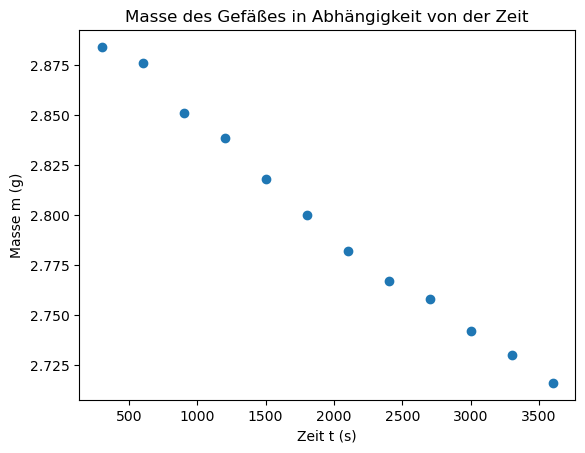

In [9]:
t = np.linspace(300,3600,12)
m = np.array([2.884, 2.876, 2.851, 2.8383, 2.8181, 2.800, 2.782, 2.767, 2.758, 2.742, 2.73, 2.716])

# plotten der Daten
plt.scatter(t, m)
plt.xlabel("Zeit t (s)")
plt.ylabel("Masse m (g)")
plt.title("Masse des Gefäßes in Abhängigkeit von der Zeit");

Wir berechnen
```math
b = \frac{ \sum (t_i - \bar{t})(m_i - \bar{m}) }{\sum (t_i - \bar{t})^2}
```


In [10]:
b = np.sum((t - np.mean(t)) * (m - np.mean(m))) / np.sum((t - np.mean(t))**2)
b

-5.2421911421911364e-05

und 
```math
a = \bar{m}- b \, \bar{t}
```

In [11]:
a = np.mean(m) - b * np.mean(t)
a


2.8990893939393936

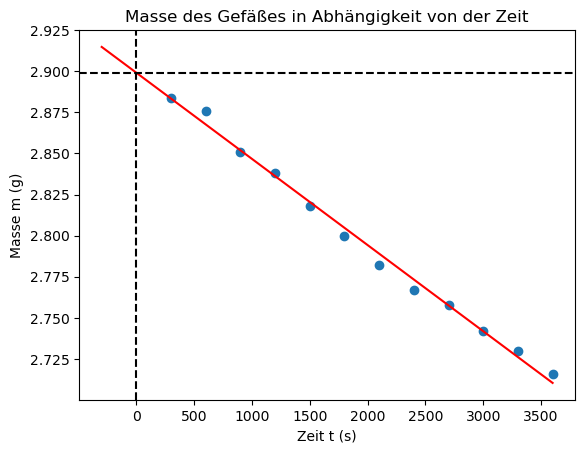

In [12]:
# Berechnen des Modells an 100 Punkten
tp = np.linspace(-300, 3600, 100)
mp = a + b * tp

# plotten der Daten
plt.scatter(t, m)
plt.plot(tp, mp, color='red')

plt.axvline(x=0, color='black', linestyle='--')
plt.axhline(y=a, color='black', linestyle='--')
plt.xlabel("Zeit t (s)")
plt.ylabel("Masse m (g)")
plt.title("Masse des Gefäßes in Abhängigkeit von der Zeit");

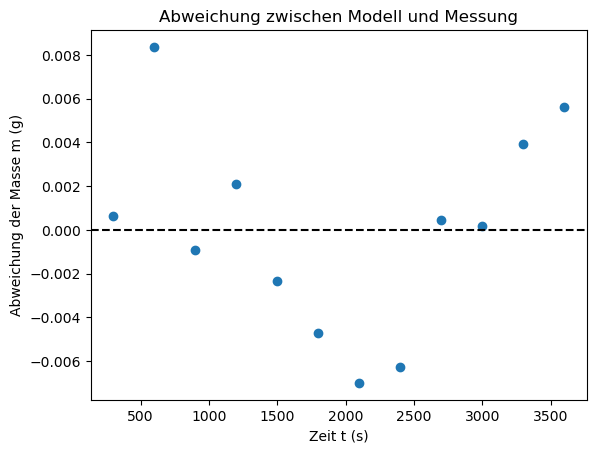

In [13]:
# Abweichung zwischen Modell und Messung
plt.scatter(t, m - (a + b * t))

plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Zeit t (s)")
plt.ylabel("Abweichung der Masse m (g)")
plt.title("Abweichung zwischen Modell und Messung");

Die Abweichung zwischen Modell und Messung sieht nicht völlig zufällig aus. Benachbarte Punkte liegen tendenziell auf der gleichen Seite der Null-Linie. Das ist ein Hinweis auf einen systematischen Fehler. Im Experiment scheint mehr zu passieren als durch das Modell beschrieben ist. Dem gehen wir hier aber nicht auf den Grund.

Berechnen wir nun die Unsicherheit in $a$ und $b$. Zunächst $u(m)$, also einen Schätz-Wert für die Unsicherheit der einzelnen Masse-Messung:
```math
u(m)^2 = \frac{1}{N-2} \sum_{n=1}^N (m(t_n) - m_n)^2
```

In [14]:
u_m = np.sqrt( 1/(np.size(t) - 2) * np.sum(((a + b * t) - m)**2) )
u_m

0.004890763617735901

dann  $\Delta$
```math
\Delta = N \sum_{n=1}^N t_n^2 -  \left( \sum_{n=1}^N  t_n \right)^2
```

In [15]:
delta = np.size(t) * np.sum(t**2) - np.sum(t)**2
delta

154440000.0

und damit $u(a)$
```math
u(a)^2 = \frac{u(b)^2}{\Delta} \sum_{n=1}^N t_n^2
```


In [16]:
u_a = np.sqrt( u_m**2 / delta * np.sum(t**2)  )
u_a

0.003010056928672937

und $u(b)$
```math
u(b)^2 = N \frac{u(m)^2}{\Delta} 
```


In [17]:
u_b = np.sqrt(np.size(t) * u_m**2 / delta)
u_b

1.3632873327216735e-06

Das Ergebniss für die Masse bei $t=0$ ist also $2.899(3)$ g. Die Durchfluss-Rate des Ventils ist $-52(1)$ µg/sec.